In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import PIL
from PIL import Image
%matplotlib inline

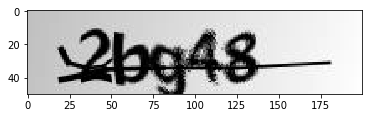

In [45]:
img = cv2.imread('2bg48.png', 0)
plt.imshow(img, 'gray')

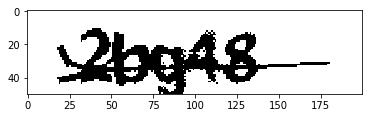

In [46]:
# Otsu thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(th2, 'gray')

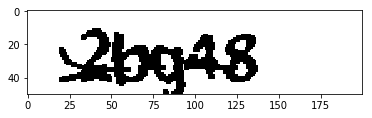

In [47]:
# Closing : Dilation + Erosion
kernel = np.ones((3,3), np.uint8)

closing = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, 'gray')

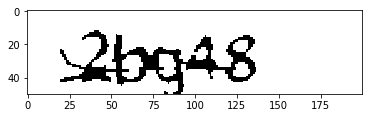

In [48]:
# Dilation with a new kernel size.

kernel = np.ones((2,3), np.uint8)

final = cv2.dilate(closing, kernel, iterations=1)

plt.imshow(final, 'gray')

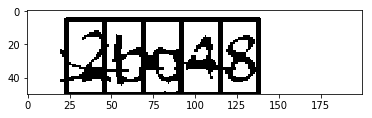

In [49]:
#Drawing rectangles to test the borders of the characters to test the hardcoded cordinates.

x, y, w, h = 23, 5, 23, 45
for  i in range(5):
    #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #cv2.rectangle(dilation, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(final, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #cv2.rectangle(dilation3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    x += w
    
    
plt.imshow(final, 'gray')

In [50]:
image = PIL.Image.fromarray(final)
image.save('segmented.png')

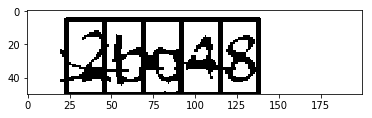

In [52]:
imageobject = Image.open('segmented.png')
plt.imshow(imageobject,'gray')

In [54]:
x, y, w, h = 23, 5, 23, 45
for  i in range(5):
    #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    crop1 = imageobject.crop((x, y, x + w, y + h))
    #cv2.rectangle(dilation, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #cv2.rectangle(dilation2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #cv2.rectangle(dilation3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    crop1.show()
    crop1.save('{}.png'.format(i))
    x += w